# NULL SPACE (MSE PGDM RESEARCH WING)

# Webscraping + NLP 

### We follow a 3 step process to check for sentiment from an existing article from moneycontrol
- Step 1: We import the request library and attach the website like we want to extract the text

In [1]:
import requests

In [2]:
response = requests.get("https://www.moneycontrol.com/editors-picks/")

In [3]:
response

<Response [200]>

'<!DOCTYPE html><html lang="en"><head><script type="text/javascript">   var is_googlebot_instl = \'0\';</script><meta name="next-head-count" content="2"/><link rel="preconnect" href="https://images.moneycontrol.com" crossorigin><link rel="dns-prefetch" href="https://images.moneycontrol.com">   <link rel="preload" href="https://ads.pubmatic.com/AdServer/js/pwt/113941/8278/pwt.js" as="script"><link rel="preload" href="https://www.googletagmanager.com/gtm.js?id=GTM-WCG4TX9" as="script"><link rel="preload" href="https://www.google-analytics.com/analytics.js" as="script"><link rel="preload" href="https://sb.scorecardresearch.com/beacon.js" as="script">      <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0" /><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="robots" content="index,follow"><meta name="robots" content="max-image-preview:large"/><link href="//stat1.moneycontrol.com/mcnews/css/jquery.mCustomScrollbar.css?v=0.1" rel="dns-prefe
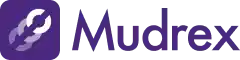

In [4]:
response.text

*Why do we parse?*
- We are making the raw text into a structured format for further analysis

In [5]:
from bs4 import BeautifulSoup 

In [6]:
parsed = BeautifulSoup(response.text,"html.parser")

<!DOCTYPE html>
<html lang="en"><head><script type="text/javascript">   var is_googlebot_instl = '0';</script><meta content="2" name="next-head-count"/><link crossorigin="" href="https://images.moneycontrol.com" rel="preconnect"/><link href="https://images.moneycontrol.com" rel="dns-prefetch"/> <link as="script" href="https://ads.pubmatic.com/AdServer/js/pwt/113941/8278/pwt.js" rel="preload"/><link as="script" href="https://www.googletagmanager.com/gtm.js?id=GTM-WCG4TX9" rel="preload"/><link as="script" href="https://www.google-analytics.com/analytics.js" rel="preload"/><link as="script" href="https://sb.scorecardresearch.com/beacon.js" rel="preload"/> <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="index,follow" name="robots"/><meta content="max-image-preview:large" name="robots"><link defer="" href="//stat1.moneycontrol.com/mcnews/css/jquery.mCustomScrollbar.css?v=0.1" rel="
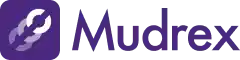

In [7]:
parsed

- Step 2: Once the text is structured we decide on which text/para/sentance we want to you for analysis. We inspect the page and see the code.
- *We want to know under which block of code the text is* 

In [19]:
first_level = parsed.find("div", id="descfromajax")

In [20]:
first_level

<div id="descfromajax"><p>Reliance Industries, India’s largest company by market cap, reported a <a href="https://www.moneycontrol.com/news/business/earnings/reliance-industries-q3-revenue-rises-10-on-digital-oil-to-chemicals-growth-13776190.html" onclick="geteditor('resilient performance in the third quarter','https://www.moneycontrol.com/news/business/earnings/reliance-industries-q3-revenue-rises-10-on-digital-oil-to-chemicals-growth-13776190.html','16-01-2026')">resilient performance in the third quarter</a>, with consolidated revenue rising 10% year-on-year to Rs. 2.94 lakh crore. Net profit rose 1.6% year-on-year to Rs. 22,290 crore - led by growth in digital services, oil-to-chemicals and retail businesses - and consolidated EBIDTA was up by 6.1% to Rs. 50,932 crore. Jio now has more than 500 million subscribers, half of whom are on 5G plans.</p><p>The Supreme Court's ruling that private equity firm Tiger Global's $1.6 billion stake sale in Flipkart is subject to taxation in Indi

- We want to see under what interior block the text is, which is the second level,

In [28]:
s2 = first_level.find("p")   #since it's under the <p> in the inspect page
print(s2.text.strip())

Reliance Industries, India’s largest company by market cap, reported a resilient performance in the third quarter, with consolidated revenue rising 10% year-on-year to Rs. 2.94 lakh crore. Net profit rose 1.6% year-on-year to Rs. 22,290 crore - led by growth in digital services, oil-to-chemicals and retail businesses - and consolidated EBIDTA was up by 6.1% to Rs. 50,932 crore. Jio now has more than 500 million subscribers, half of whom are on 5G plans.


In [30]:
s2.text

'Reliance Industries, India’s largest company by market cap, reported a resilient performance in the third quarter, with consolidated revenue rising 10% year-on-year to Rs. 2.94 lakh crore. Net profit rose 1.6% year-on-year to Rs. 22,290 crore - led by growth in digital services, oil-to-chemicals and retail businesses - and consolidated EBIDTA was up by 6.1% to Rs. 50,932 crore. Jio now has more than 500 million subscribers, half of whom are on 5G plans.'

In [40]:
paras = first_level.find_all("p")

In [41]:
paragraphs = []

for p in paras:
    clean_text = " ".join(p.text.split())
    paragraphs.append(clean_text)

print(len(paragraphs))


8


*We are checking for the number of paragraphs*

In [42]:
print(paragraphs[0])  #this is paragraph one

Reliance Industries, India’s largest company by market cap, reported a resilient performance in the third quarter, with consolidated revenue rising 10% year-on-year to Rs. 2.94 lakh crore. Net profit rose 1.6% year-on-year to Rs. 22,290 crore - led by growth in digital services, oil-to-chemicals and retail businesses - and consolidated EBIDTA was up by 6.1% to Rs. 50,932 crore. Jio now has more than 500 million subscribers, half of whom are on 5G plans.


In [43]:
paragraphs #all paragraphs

['Reliance Industries, India’s largest company by market cap, reported a resilient performance in the third quarter, with consolidated revenue rising 10% year-on-year to Rs. 2.94 lakh crore. Net profit rose 1.6% year-on-year to Rs. 22,290 crore - led by growth in digital services, oil-to-chemicals and retail businesses - and consolidated EBIDTA was up by 6.1% to Rs. 50,932 crore. Jio now has more than 500 million subscribers, half of whom are on 5G plans.',
 "The Supreme Court's ruling that private equity firm Tiger Global's $1.6 billion stake sale in Flipkart is subject to taxation in India has widespread implications. Pavan Burugula has two pieces on what the ruling means for investors. First he looks at how more than 500 foreign funds in India's F&O market might be affected. Second, he writes on how this could result in billions of dollars in tax demands not only for foreign portfolio investors and private equity funds but also large overseas companies with investments in India. Als

In [56]:
single_para = " ".join(first_level.text.split())
print(single_para) 

Reliance Industries, India’s largest company by market cap, reported a resilient performance in the third quarter, with consolidated revenue rising 10% year-on-year to Rs. 2.94 lakh crore. Net profit rose 1.6% year-on-year to Rs. 22,290 crore - led by growth in digital services, oil-to-chemicals and retail businesses - and consolidated EBIDTA was up by 6.1% to Rs. 50,932 crore. Jio now has more than 500 million subscribers, half of whom are on 5G plans.The Supreme Court's ruling that private equity firm Tiger Global's $1.6 billion stake sale in Flipkart is subject to taxation in India has widespread implications. Pavan Burugula has two pieces on what the ruling means for investors. First he looks at how more than 500 foreign funds in India's F&O market might be affected. Second, he writes on how this could result in billions of dollars in tax demands not only for foreign portfolio investors and private equity funds but also large overseas companies with investments in India. Also read 

*We merged all the paragraphs into a single big paragraph*

In [44]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

In [45]:
import pandas as pd

*Step 3:- Once the data is sorted and merged into a single paragraph, we now want to use FinBERT.* 

In [46]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--yiyanghkust--finbert-tone. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [48]:
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

*Testing the model here with example texts*

In [49]:
trial = nlp("""The Bank’s key financial parameters continued to be healthy,
due to its robust credit evaluation of targeted customers and a
well-diversified loan book across sectors, customer segments
and products.""")
trial

[{'label': 'Positive', 'score': 1.0}]

In [52]:
nlp("The stock is going to increase")

[{'label': 'Positive', 'score': 0.786689281463623}]

In [53]:
nlp("The stock is not going to increase")

[{'label': 'Negative', 'score': 0.6065390706062317}]

*You see the difference by just adding a not, how its reducing the score.*

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
from nltk.tokenize import sent_tokenize

- We break the para into sentences

In [57]:
sentences = sent_tokenize(single_para)

results = []

for s in sentences:
    res = nlp(s)[0]
    results.append({
        "sentence" : s,
        "label": res["label"],
        "score": round(res["score"], 4)
    })

*Why we do this? Because max token for FinBert is 512 tokens, and we want a meaningful sepration of the para and sentences are a good option.*
- We could have directly done with pargraph but we are just trying with sentences.

In [58]:
len(sentences)

16

- We will make our text into data frame

In [59]:
df = pd.DataFrame(results)
df

,sentence,label,score
0,"Reliance Industries, India’s largest company b...",Positive,1.0000
1,2.94 lakh crore.,Neutral,0.9998
2,Net profit rose 1.6% year-on-year to Rs.,Positive,1.0000
3,"22,290 crore - led by growth in digital servic...",Positive,1.0000
4,"50,932 crore.",Neutral,0.9996
5,"Jio now has more than 500 million subscribers,...",Negative,0.9105
6,Pavan Burugula has two pieces on what the ruli...,Neutral,1.0000
7,First he looks at how more than 500 foreign fu...,Neutral,0.9999
8,"Second, he writes on how this could result in ...",Neutral,1.0000
9,Also read Meghna Mittal’s explainer on how thi...,Neutral,1.0000


*Here we see that how each sentance has a score.*

In [63]:
df['score'].mean()

0.9545250000000001

### It's neutral or close to positive

In [60]:
df['label'].value_counts()

label
Neutral     11
Positive     3
Negative     2
Name: count, dtype: int64

In [61]:
import matplotlib.pyplot as plt

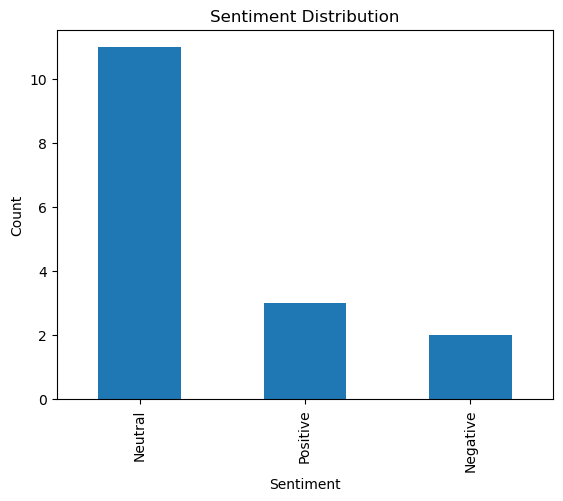

In [62]:
df['label'].value_counts().plot(kind='bar')

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

*The majority of the sentences are neutral and through this, later analysis can be done regarding the particular stock/sector*